<a href="https://colab.research.google.com/github/LikhithaGuggilla/Python/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Customer Churn Prediction

## Import modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# for preprocessing
from sklearn import preprocessing
# for data partition
from sklearn.model_selection import train_test_split
# for Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# for Assessing model performance
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc
# for classification
from sklearn import svm
# for boosting model performance
import xgboost as xgb
# warnings.filterwarnings("ignore")

## Read Data

In [ ]:
# mount drive to import dataset
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# read dataset
df = pd.read_csv("/content/drive/MyDrive/Python/Churn_Modelling.csv")

In [ ]:
df.head()
# Target = Exited, Predictors = all other columns

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Data Preprocessing

In [ ]:
# missing values in each column
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Finding categorical columns and no.of categories

1. using 'For' loop

In [ ]:
# determine categorical columns
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
cat_cols # gives a list of categorical columns

['Surname', 'Geography', 'Gender']

In [ ]:
# categories in categorical columns without using unique

cat = df[cat_cols] # create a cat dataframe for cat columns
for col in cat.columns:
    print('{} has total {} categories\n'.format(col,len(cat[col].value_counts())))


Surname has total 2932 categories

Geography has total 3 categories

Gender has total 2 categories



2. Using 'Unique()'

In [ ]:
# categories in categorical columns
df['Geography'].unique() # 3 countries

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df['Gender'].unique() # 2 genders

array(['Female', 'Male'], dtype=object)

In [ ]:
# columns - categorical to continuous conversion by encoding labels
label_encoder = preprocessing.LabelEncoder()

df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])


In [ ]:
# countries and genders are encoded with numerical values
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
# predictors and target

predictors = df.drop(['RowNumber','CustomerId','Surname','Exited'],axis = 1) # drop unwanted columns and target
target = df.Exited

In [ ]:
predictors.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [ ]:
target.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

## Partition Data

In [ ]:
# split the dataset
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size = 0.3,random_state = 213) # random is used to set a seed

## Models

### Logistic Regression

In [ ]:
# model
lr_model = LogisticRegression()

# fit the model to training set
lr_model.fit(X_train,Y_train)

# test the model
Y_pred = lr_model.predict(X_test)

# see the model accuracy
lr_accuracy = accuracy_score(Y_test,Y_pred)
print("Logistic Regression model accuracy is: {:.2f}%".format(lr_accuracy*100)) # {} is a placeholder and .format replaces this placeholder with the value in it's brackets


Logistic Regression model accuracy is: 79.03%


In [ ]:
# classification report helps evaluate model performance
print("classification report:\n",classification_report(Y_test,Y_pred))

classification report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      2379
           1       0.45      0.06      0.10       621

    accuracy                           0.79      3000
   macro avg       0.62      0.52      0.49      3000
weighted avg       0.73      0.79      0.72      3000



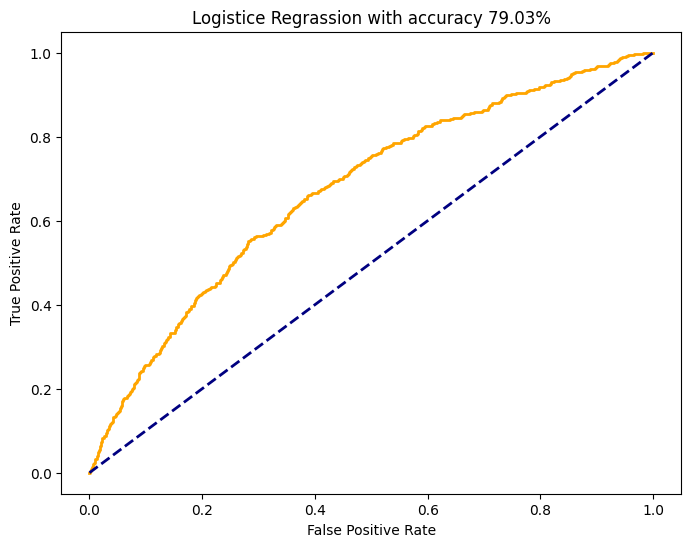

In [ ]:
# ROC curve

# get the predicted probabilities
Y_prob = lr_model.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(Y_test,Y_prob)

# plot
plt.figure(figsize=(8,6)) # plot size
plt.plot(fpr,tpr,color = 'Orange',lw=2)
plt.plot([0,1],[0,1],color='Navy',lw=2,linestyle='--')

# labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistice Regrassion with accuracy {:.2f}%'.format(lr_accuracy*100))
plt.show()


### Random Forest

In [ ]:
# RandomForest Model
rf_model = RandomForestClassifier()

# fit the model
rf_model.fit(X_train,Y_train)

# make predictions
Y_pred = rf_model.predict(X_test)

# Assess the model performance
rf_accuracy = accuracy_score(Y_test,Y_pred)
print('Random Forest Model accuracy is: {:.3f}%'.format(rf_accuracy*100))

Random Forest Model accuracy is: 86.400%


In [ ]:
# Classification report
print('classification report:\n',classification_report(Y_test,Y_pred))

classification report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      2379
           1       0.78      0.48      0.60       621

    accuracy                           0.86      3000
   macro avg       0.83      0.72      0.76      3000
weighted avg       0.86      0.86      0.85      3000



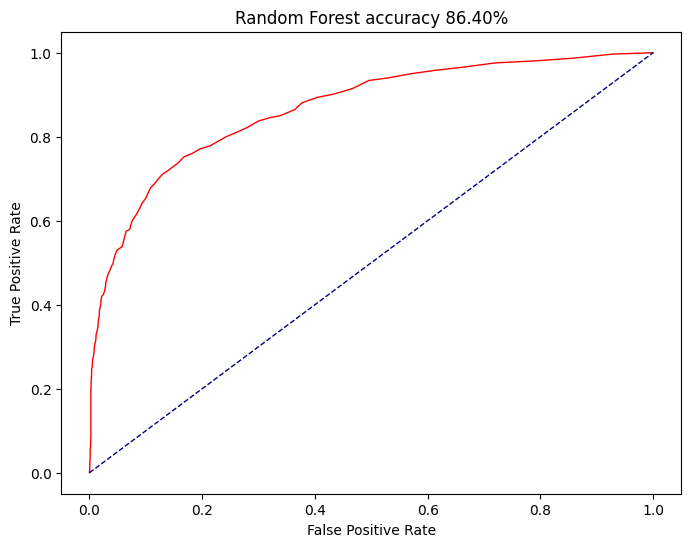

In [ ]:
# roc curve

# get the probability predictions
Y_prob = rf_model.predict_proba(X_test)[:,1]

# roc
fpr,tpr,thresholds = roc_curve(Y_test,Y_prob)

# plot
plt.figure(figsize = (8,6))
plt.plot(fpr,tpr,color = 'red',lw=1)
plt.plot([0,1],[0,1],color= 'navy',lw = 1,linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest accuracy {:.2f}%'.format(rf_accuracy*100))
plt.show()

### XGBoost

In [ ]:
# XGBoost Model
xg_model = xgb.XGBClassifier(objective='reg:squarederror',random_state=42)

# fit the model
xg_model.fit(X_train,Y_train)

# make predictions
Y_pred = xg_model.predict(X_test)

# assess the model accuracy
xg_accuracy = accuracy_score(Y_test,Y_pred)
print('XGBoost model accuracy is: {:.2f}%'.format(xg_accuracy*100))

XGBoost model accuracy is: 86.23%


In [ ]:
# classification Report
print('Classification report:\n',classification_report(Y_test,Y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.92      2379
           1       0.74      0.51      0.61       621

    accuracy                           0.86      3000
   macro avg       0.81      0.73      0.76      3000
weighted avg       0.85      0.86      0.85      3000



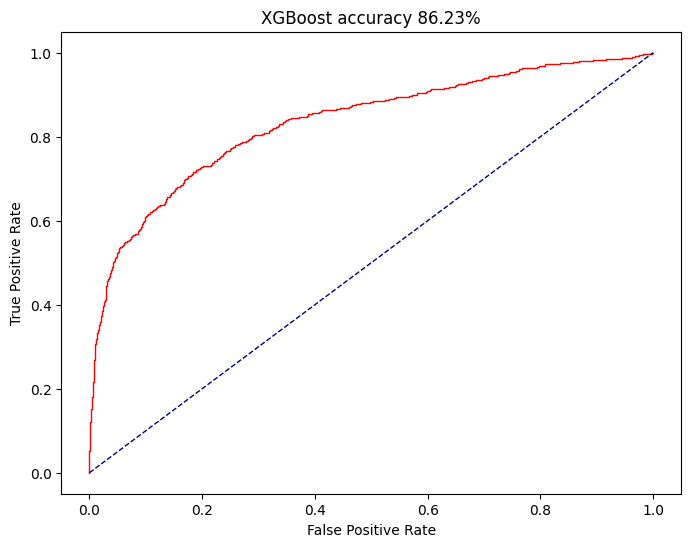

In [ ]:
# roc curve
Y_prob = xg_model.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(Y_test,Y_prob)

# plot
plt.figure(figsize = (8,6))
plt.plot(fpr,tpr,color = 'red',lw=1)
plt.plot([0,1],[0,1],color= 'navy',lw = 1,linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost accuracy {:.2f}%'.format(xg_accuracy*100))
plt.show()

## Model comparison

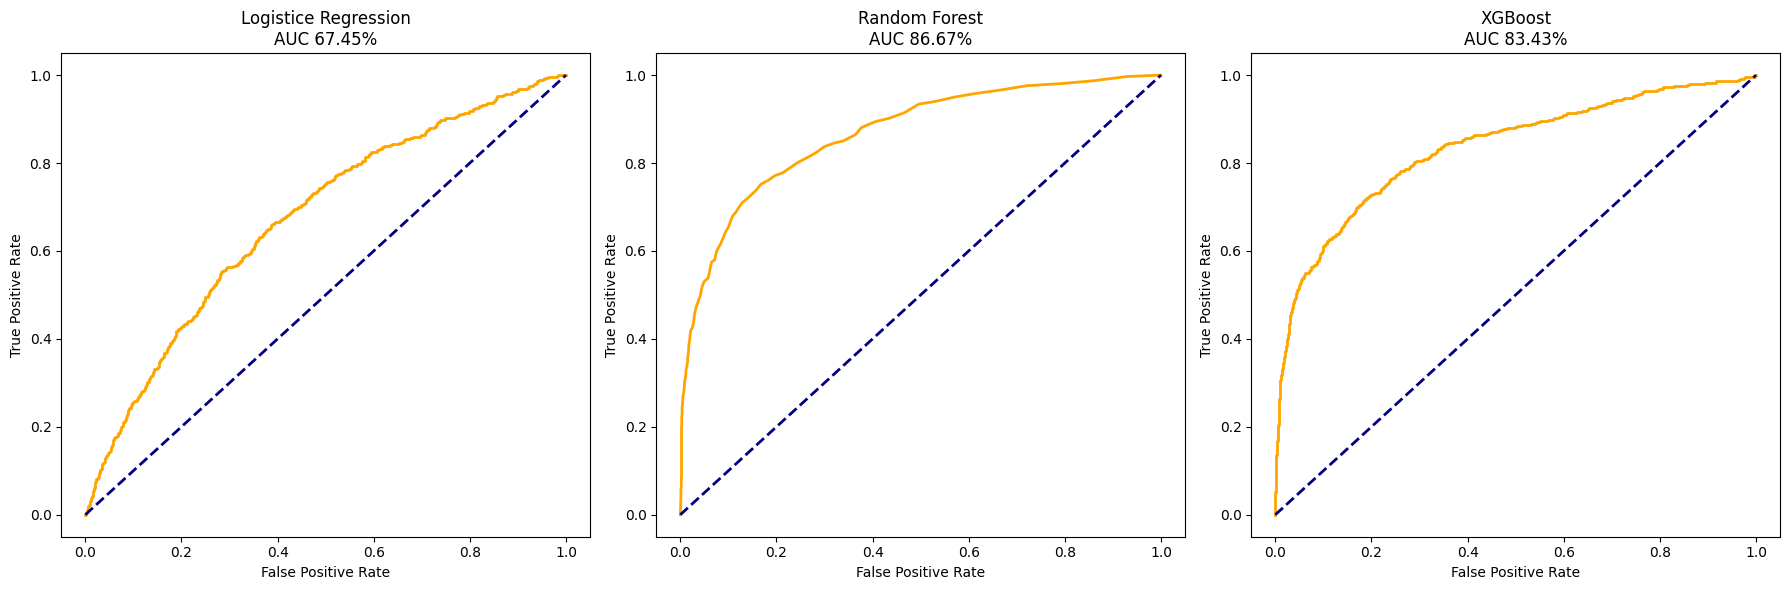

In [ ]:
# model comparison

# Logistic
Y_prob_lr = lr_model.predict_proba(X_test)[:,1]
fpr_lr,tpr_lr,thresholds_lr = roc_curve(Y_test,Y_prob_lr)
roc_auc_lr = auc(fpr_lr,tpr_lr) # auc

# Random forest
Y_prob_rf = rf_model.predict_proba(X_test)[:,1]
fpr_rf,tpr_rf,thresholds_rf = roc_curve(Y_test,Y_prob_rf)
roc_auc_rf = auc(fpr_rf,tpr_rf) # auc

# XGBoost
Y_prob_xg = xg_model.predict_proba(X_test)[:,1]
fpr_xg,tpr_xg,thresholds_xg = roc_curve(Y_test,Y_prob_xg)
roc_auc_xg = auc(fpr_xg,tpr_xg) # auc

# sub plot with 1 row and 3 plots
plt.figure(figsize=(18,6)) # plot size

# Logistic plot
plt.subplot(1,3,1)
plt.plot(fpr_lr,tpr_lr,color = 'Orange',lw=2)
plt.plot([0,1],[0,1],color='Navy',lw=2,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistice Regression\nAUC {:.2f}%'.format(roc_auc_lr*100))

# Random forest plot
plt.subplot(1,3,2)
plt.plot(fpr_rf,tpr_rf,color = 'Orange',lw=2)
plt.plot([0,1],[0,1],color='Navy',lw=2,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest\nAUC {:.2f}%'.format(roc_auc_rf*100))

# XGBoost plot
plt.subplot(1,3,3)
plt.plot(fpr_xg,tpr_xg,color = 'Orange',lw=2)
plt.plot([0,1],[0,1],color='Navy',lw=2,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost\nAUC {:.2f}%'.format(roc_auc_xg*100))

# adjust layout to prevent overlap
plt.tight_layout()

plt.show()